# **DOMAIN´S CLUSTERING**

- In this notebook I´m going to try and test different clustering models, preprocessing the data in different ways to compare and choose the best results, that is, to find different clusters with similar charasteristics or properties, with the objective of make the advertiser decision of where are the optimal domains to invest easier

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import seaborn as sns
import pickle
from sklearn.cluster import KMeans

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

from sklearn.model_selection import GridSearchCV

from sklearn.decomposition import PCA

from sklearn.metrics import silhouette_samples, silhouette_score

pd.options.display.float_format = '{:.2f}'.format #So the numbers will not appear in a scientific format

#! pip install pyclustertend

In [4]:
groupby_domains = pd.read_csv('Global groupby_domains.csv')

I´m gonna test the clustering over two different data transformations :

- **Standarizing the data with Standard Scaler**
- **Scaling features using statistics that are robust to outliers with Robust Scaler**

****In order to get a better clustering performance, I´m gonna drop the following columns :****

- **Domain:** it´s a string and doesn´t add nothing to the model
- **Category:** I could convert the Categories into numbers, but this can strongly affect to the model, and the categories are also represented in the Category importance columns
- **Viewability Rate, Efficiency Rate:** these columns are important to the advertisers (that´s the reason I didn´t drop them in the first place) but both of them have really high percentages for most of Domains, so they are not useful to find differences between them

In [5]:
groupby_domains_clustering = groupby_domains.drop(['Domain','Category', 'Viewability Rate', 'Efficiency Rate'], 1)

groupby_domains_StandardScaler = StandardScaler().fit_transform(groupby_domains_clustering)
groupby_domains_RobustScaler = RobustScaler().fit_transform(groupby_domains_clustering)

In [7]:
pd.DataFrame(groupby_domains_StandardScaler).describe() 

,0,1,2,3,4,5,6,7,8
count,818.00,818.00,818.00,818.00,818.00,818.00,818.00,818.00,818.00
mean,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.56,-0.59,-0.84,-6.81,-0.51,-1.30,-6.30,-1.24,-0.72
25%,-0.46,-0.49,-0.66,-0.40,-0.44,-0.69,-0.39,-1.07,-0.72
50%,-0.33,-0.29,-0.30,-0.09,-0.28,-0.13,0.19,0.92,-0.72
75%,0.03,0.10,0.28,0.29,0.09,0.46,0.61,0.92,0.29
max,12.37,10.92,7.49,7.51,17.32,7.55,2.35,0.92,2.31


In [8]:
pd.DataFrame(groupby_domains_RobustScaler).describe()

,0,1,2,3,4,5,6,7,8
count,818.00,818.00,818.00,818.00,818.00,818.00,818.00,818.00,818.00
mean,0.67,0.49,0.32,0.13,0.51,0.12,-0.19,-0.46,0.72
std,2.04,1.71,1.06,1.45,1.87,0.87,1.01,0.50,0.99
min,-0.47,-0.50,-0.57,-9.76,-0.43,-1.01,-6.52,-1.09,0.00
25%,-0.26,-0.34,-0.38,-0.44,-0.31,-0.49,-0.58,-1.00,0.00
50%,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.74,0.66,0.62,0.56,0.69,0.51,0.42,0.00,1.00
max,25.87,19.10,8.29,11.04,32.82,6.69,2.17,0.00,3.00


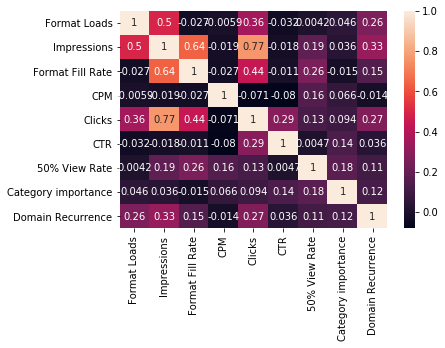

In [63]:
sns.heatmap(groupby_domains_clustering.corr(), annot=True)

In [7]:
pca = PCA()
pca.fit_transform(groupby_domains_clustering)

array([[ 2.65386028e+06, -1.68601704e+05,  6.72862842e+01, ...,
        -3.74462809e-01, -3.34314896e-01,  5.33953917e-02],
       [ 2.23456644e+06,  5.59839320e+02, -7.24997814e+02, ...,
         1.09538596e+00,  2.91551653e-01, -1.11109791e-01],
       [ 1.97288942e+06,  1.65355846e+05, -4.67708333e+02, ...,
         1.18795675e+00,  7.54422888e-02, -2.13746469e-01],
       ...,
       [-1.19663428e+05, -1.88520669e+03,  3.89132686e+01, ...,
         7.20753524e-01,  1.84942026e-01, -9.61462003e-02],
       [-1.19719489e+05, -1.42716964e+03, -4.76739090e+00, ...,
         8.78707121e-02, -7.15761396e-01, -1.37216434e+00],
       [-1.19521983e+05,  9.94323626e+03,  7.16406472e+01, ...,
         3.35420583e-01,  2.26076579e-01, -6.82135552e-02]])

Text(0, 0.5, 'Cumulative explained variance')

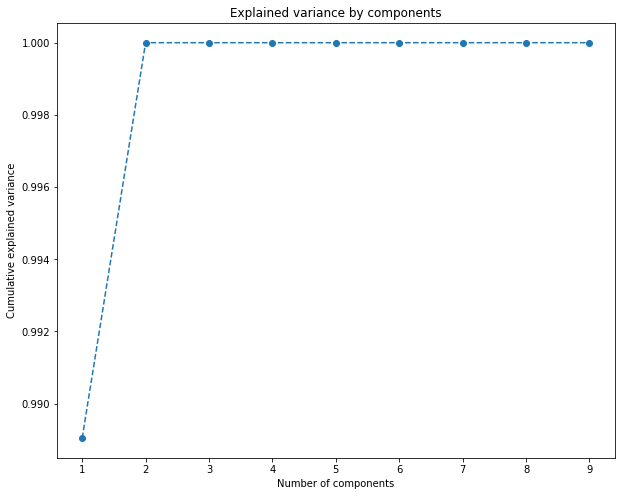

In [8]:
plt.figure(figsize=(10,8))
plt.plot(range(1,10), pca.explained_variance_ratio_.cumsum(), marker= 'o' , linestyle = '--')
plt.title('Explained variance by components')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [9]:
pca = PCA(n_components=2)
groupby_domains_clustering_pca = pca.fit_transform(groupby_domains_clustering)

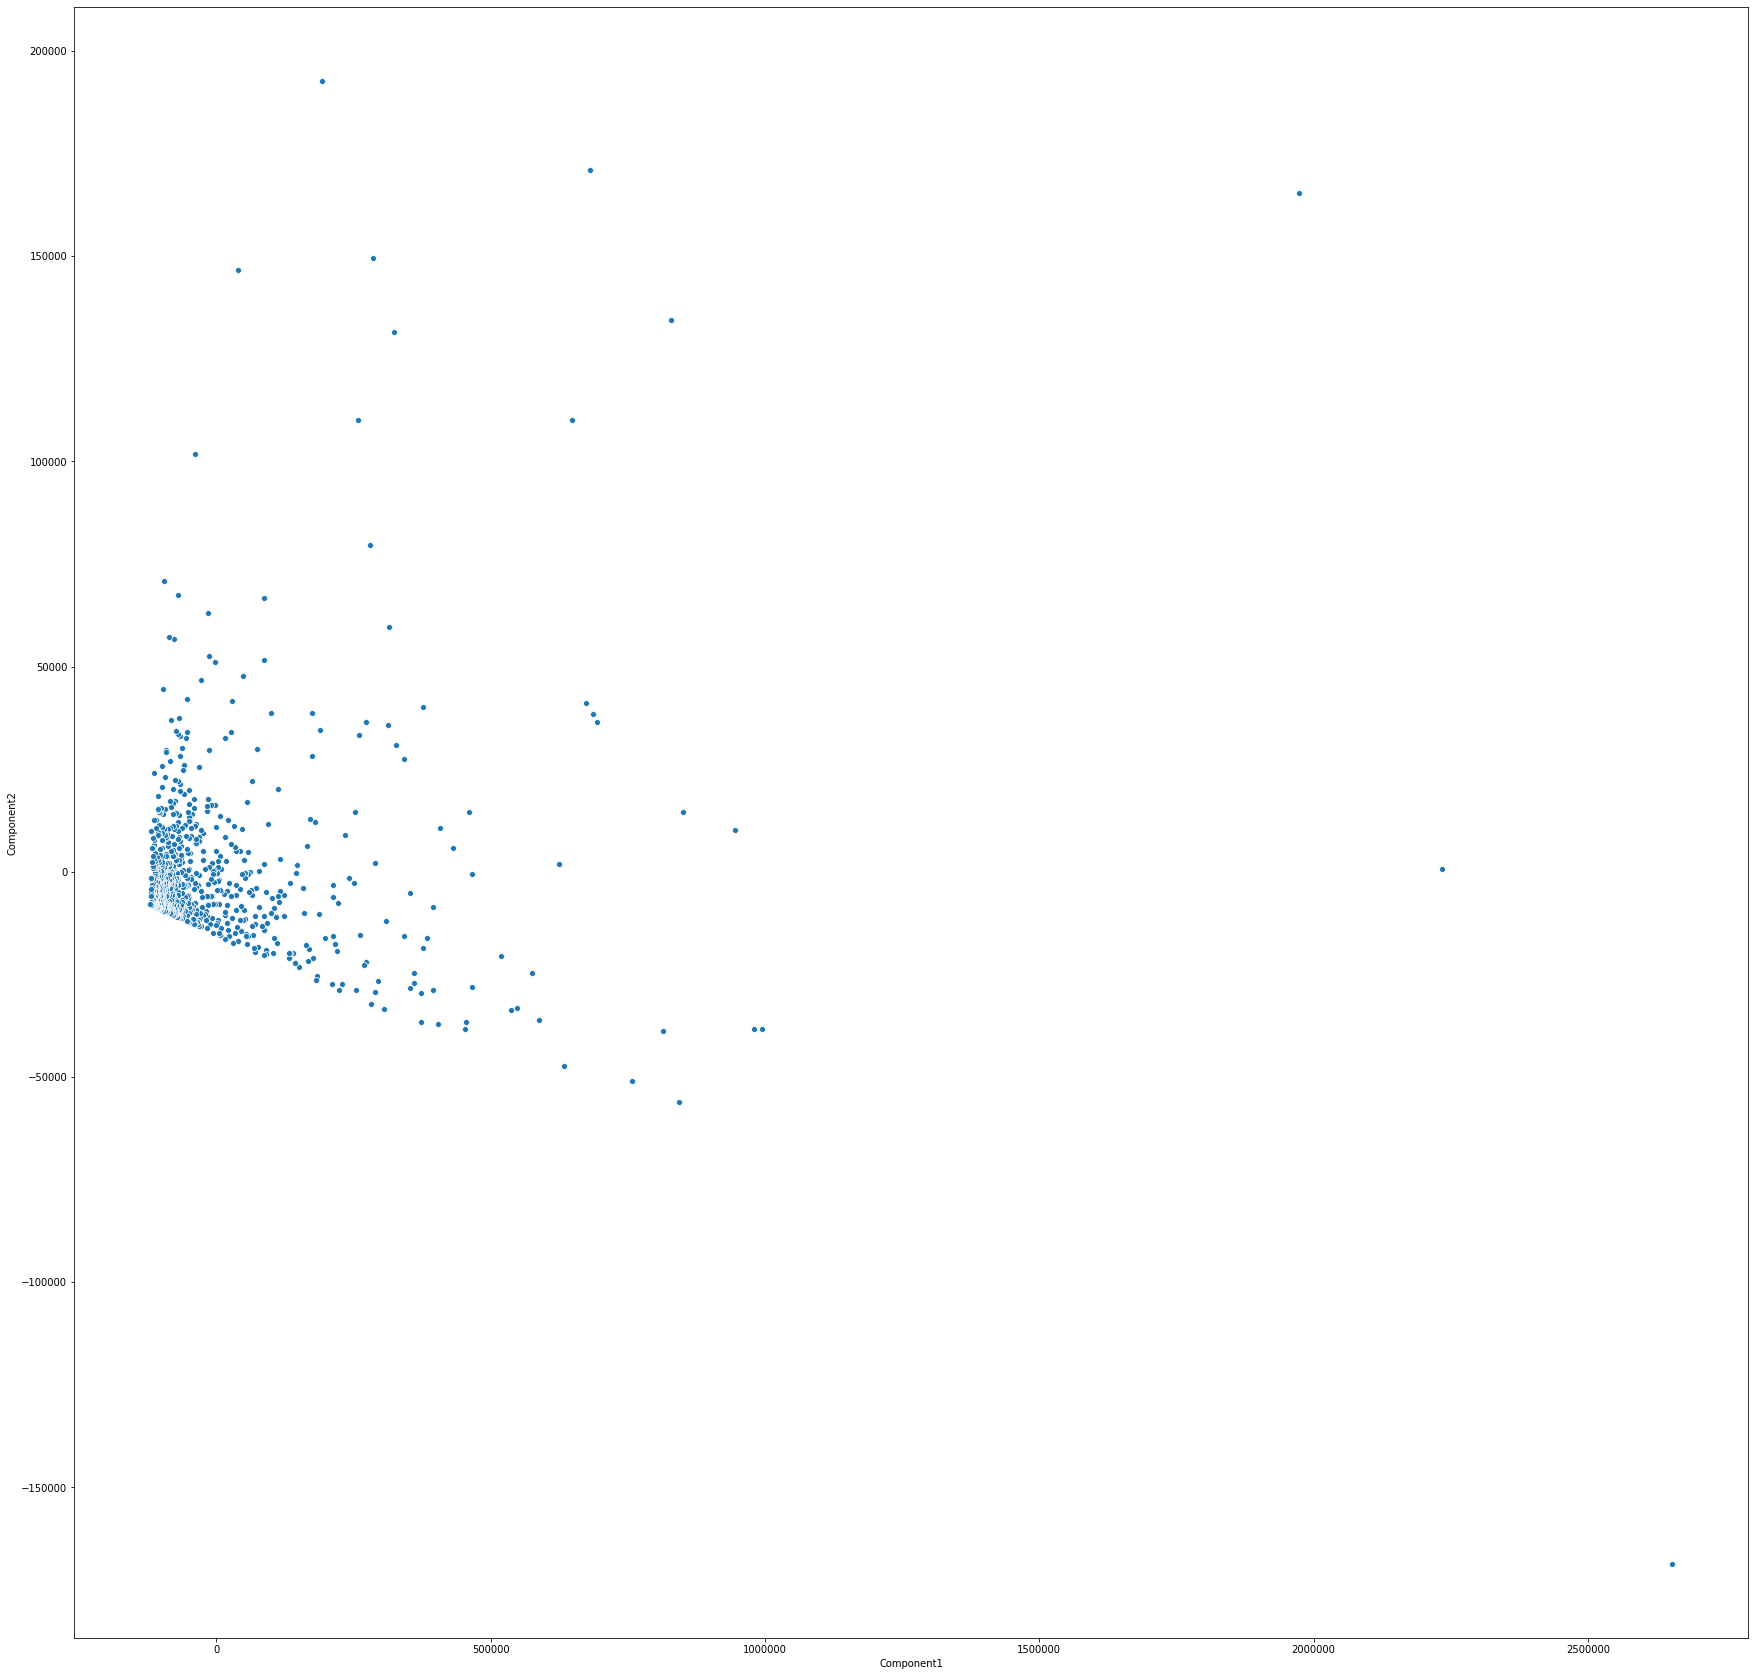

In [17]:
groupby_domains_clustering_pca = pd.DataFrame(groupby_domains_clustering_pca, columns=['Component1', 'Component2'])
plt.figure(figsize = (30,30))
sns.scatterplot(groupby_domains_clustering_pca['Component1'], groupby_domains_clustering_pca['Component2'])


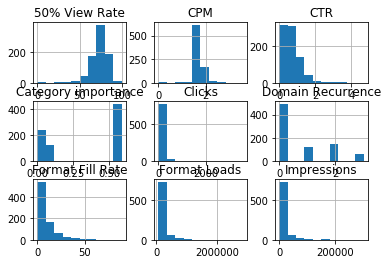

In [36]:
groupby_domains_clustering.hist();

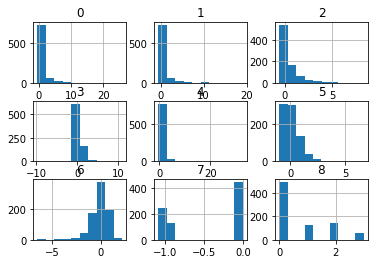

In [38]:
pd.DataFrame(groupby_domains_RobustScaler).hist();

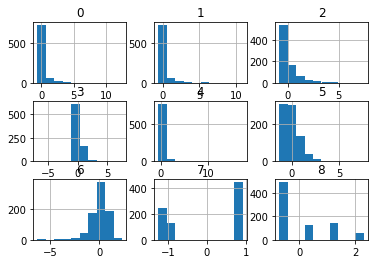

In [39]:
pd.DataFrame(groupby_domains_StandardScaler).hist();

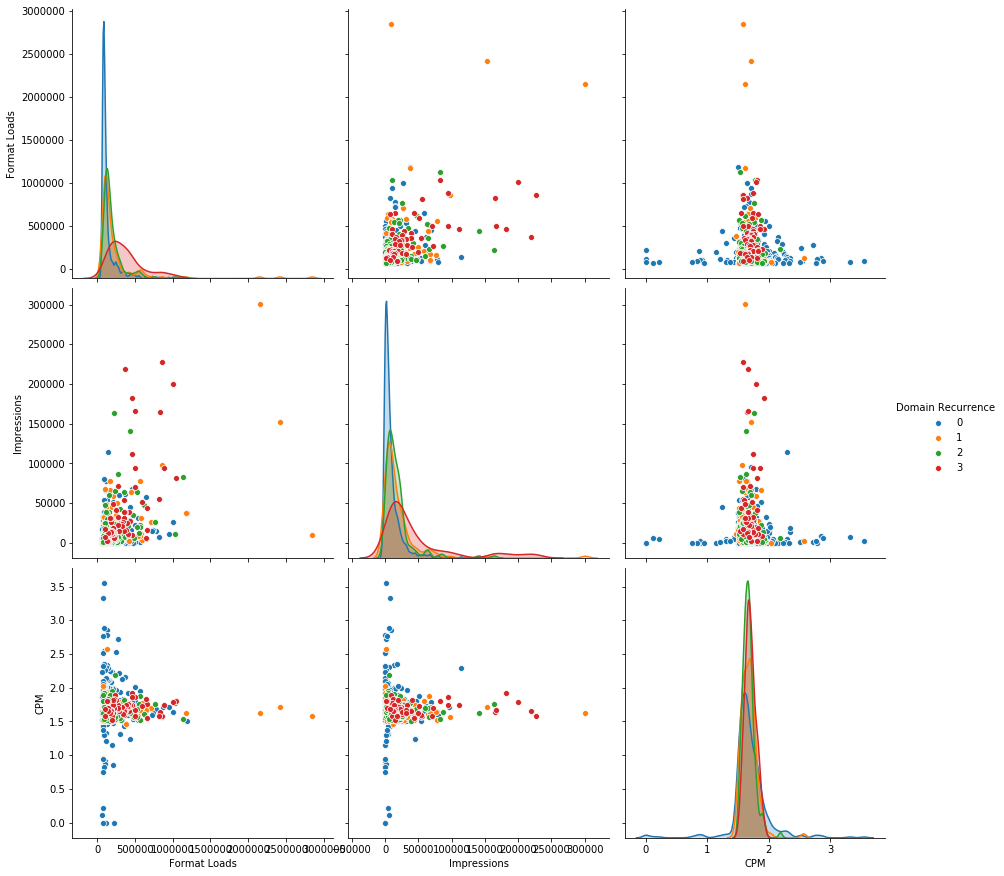

In [44]:
sns.pairplot(groupby_domains_clustering, hue= 'Domain Recurrence', size=4,vars=["Format Loads","Impressions","CPM"],kind='scatter')

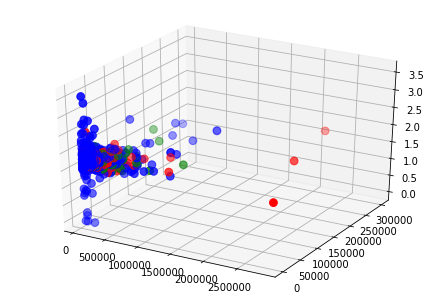

In [47]:
from mpl_toolkits.mplot3d import Axes3D
X = np.array(groupby_domains_clustering[["Format Loads","Impressions","CPM"]])
y = np.array(groupby_domains_clustering['Domain Recurrence'])
X.shape

fig = plt.figure()
ax = Axes3D(fig)
colores=['blue','red','green','blue','cyan','yellow','orange','black','pink','brown','purple']
asignar=[]
for row in y:
    asignar.append(colores[row])
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)

## Applying GRIDSEARCHCV to find the best parameters for KMEANS ALGORITHM

- ### With the Standard Scaler transformation:

In [8]:
kmeans = KMeans()
parameters = {'n_clusters':range(1,15),
              'init' : ('k-means++', 'random'), 
              'n_init':[5,10,15,20,25],
              'max_iter' : [50,100,200,300,400,500,700,1000],
              'algorithm' : ('auto', 'full', 'elkan')}

gridsearchcv_standardscaler = GridSearchCV(estimator = kmeans, param_grid = parameters)

In [10]:
%%time
gridsearchcv_standardscaler.fit(groupby_domains_StandardScaler)

Wall time: 42min 47s


GridSearchCV(cv=None, error_score=nan,
             estimator=KMeans(algorithm='auto', copy_x=True, init='k-means++',
                              max_iter=300, n_clusters=8, n_init=10,
                              n_jobs=None, precompute_distances='auto',
                              random_state=None, tol=0.0001, verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid={'algorithm': ('auto', 'full', 'elkan'),
                         'init': ('k-means++', 'random'),
                         'max_iter': [50, 100, 200, 300, 400, 500, 700, 1000],
                         'n_clusters': range(1, 15),
                         'n_init': [5, 10, 15, 20, 25]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [12]:
#Saving the results in a DataFrame
gridsearch_results_SS = pd.DataFrame(gridsearchcv_standardscaler.cv_results_).sort_values(by='rank_test_score')
gridsearch_results_SS.to_csv('GridSearch Standard Scaler Results.csv')
gridsearch_results_SS.head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_init,param_max_iter,param_n_clusters,param_n_init,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3145,0.04,0.00,0.00,0.00,elkan,random,400,14,5,"{'algorithm': 'elkan', 'init': 'random', 'max_...",-1817.66,-527.36,-547.53,-402.67,-441.44,-747.33,537.82,1
1815,0.08,0.01,0.00,0.00,full,random,100,14,5,"{'algorithm': 'full', 'init': 'random', 'max_i...",-2077.53,-493.75,-527.52,-408.41,-485.67,-798.58,640.67,2
3146,0.10,0.00,0.00,0.00,elkan,random,400,14,10,"{'algorithm': 'elkan', 'init': 'random', 'max_...",-2102.65,-454.43,-534.86,-390.99,-510.29,-798.64,653.88,3


In [13]:
# save the model to disk
filename = 'gridsearchmodel_standardscaler.sav'
pickle.dump(gridsearchcv_standardscaler, open(filename, 'wb'))

In [14]:
# load the model from disk
filename = 'gridsearchmodel_standardscaler.sav'
gridsearchmodel_standardscaler = pickle.load(open(filename, 'rb'))


In [15]:
gridsearchmodel_standardscaler.best_estimator_

KMeans(algorithm='elkan', copy_x=True, init='random', max_iter=400,
       n_clusters=14, n_init=5, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

- ### With the Robust Scaler transformation:

In [16]:
kmeans = KMeans()
parameters = {'n_clusters':range(1,17),
              'init' : ('k-means++', 'random'), 
              'n_init':[5,10,15,20,25],
              'max_iter' : [50,100,200,300,400,700,1000],
              'algorithm' : ('auto', 'full', 'elkan')}

gridsearchcv_robustscaler = GridSearchCV(estimator = kmeans, param_grid = parameters)

In [17]:
%%time
gridsearchcv_robustscaler.fit(groupby_domains_RobustScaler)

Wall time: 51min 34s


GridSearchCV(cv=None, error_score=nan,
             estimator=KMeans(algorithm='auto', copy_x=True, init='k-means++',
                              max_iter=300, n_clusters=8, n_init=10,
                              n_jobs=None, precompute_distances='auto',
                              random_state=None, tol=0.0001, verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid={'algorithm': ('auto', 'full', 'elkan'),
                         'init': ('k-means++', 'random'),
                         'max_iter': [50, 100, 200, 300, 400, 700, 1000],
                         'n_clusters': range(1, 17),
                         'n_init': [5, 10, 15, 20, 25]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [19]:
#Saving the results in a DataFrame
gridsearch_results_RS = pd.DataFrame(gridsearchcv_robustscaler.cv_results_).sort_values(by='rank_test_score')
gridsearch_results_RS.to_csv('GridSearch Results with Robust Scaler.csv')
gridsearch_results_RS.head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_init,param_max_iter,param_n_clusters,param_n_init,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3356,0.12,0.02,0.00,0.00,elkan,random,1000,16,10,"{'algorithm': 'elkan', 'init': 'random', 'max_...",-5372.63,-686.85,-633.02,-462.59,-555.98,-1542.21,1916.70,1
2956,0.19,0.02,0.00,0.00,elkan,random,100,16,10,"{'algorithm': 'elkan', 'init': 'random', 'max_...",-5341.84,-697.44,-665.97,-512.00,-543.19,-1552.09,1896.18,2
1039,0.38,0.04,0.00,0.00,auto,random,700,16,25,"{'algorithm': 'auto', 'init': 'random', 'max_i...",-5346.14,-675.65,-684.13,-519.91,-557.82,-1556.73,1895.79,3


In [20]:
# save the model to disk
filename = 'gridsearchmodel_robustscaler.sav'
pickle.dump(gridsearchcv_robustscaler, open(filename, 'wb'))

In [21]:
# load the model from disk
filename = 'gridsearchmodel_robustscaler.sav'
gridsearchmodel_robustscaler = pickle.load(open(filename, 'rb'))


In [22]:
gridsearchmodel_robustscaler.best_estimator_

KMeans(algorithm='elkan', copy_x=True, init='random', max_iter=1000,
       n_clusters=16, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

**I decide not to choose the random init, although it has been chosen as the best init parameter in both scenarios. In some cases, if the initialization of clusters is not appropriate, K-Means can result in arbitrarily bad clusters. This is where K-Means++ helps, because it specifies a procedure to initialize the cluster centers before moving forward with the standard k-means clustering algorithm**

**Using the K-Means++ algorithm, we optimize the step where we randomly pick the cluster centroid, and we are more likely to find a solution that is competitive to the optimal K-Means solution while using the K-Means++ initialization**

Because of that, I´ll choose the best result where with the k-means++ init:

In [19]:
gridsearch_results_RS = pd.read_csv("GridSearch Results with Robust Scaler.csv")
gridsearch_results_SS = pd.read_csv("GridSearch Standard Scaler Results.csv")
display(gridsearch_results_RS[gridsearch_results_RS['param_init']=='k-means++'].head(1))
display(gridsearch_results_RS[gridsearch_results_SS['param_init']=='k-means++'].head(1))

,Unnamed: 0,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_init,param_max_iter,param_n_clusters,param_n_init,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
9,556,0.16,0.01,0.00,0.00,auto,k-means++,1000,16,10,"{'algorithm': 'auto', 'init': 'k-means++', 'ma...",-5363.48,-682.62,-667.99,-592.56,-580.18,-1577.37,1893.49,10


,Unnamed: 0,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_init,param_max_iter,param_n_clusters,param_n_init,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
7,3350,0.06,0.00,0.00,0.00,elkan,random,1000,15,5,"{'algorithm': 'elkan', 'init': 'random', 'max_...",-5381.67,-690.97,-703.62,-508.84,-577.82,-1572.59,1905.92,8


## ELBOW METHOD to visually check the ideal number of clusters 

- ### With the Standard Scaler transformation:

In [55]:
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=1000, n_init=5, algorithm='elkan')
    kmeans.fit(groupby_domains_StandardScaler)
    wcss.append(kmeans.inertia_)
    

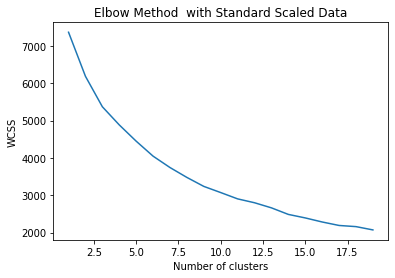

In [21]:
plt.plot(range(1, 20), wcss)
plt.title('Elbow Method  with Standard Scaled Data')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

C:\Users\Usuario\anaconda3\lib\site-packages\yellowbrick\utils\kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\Usuario\anaconda3\lib\site-packages\yellowbrick\utils\kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\Usuario\anaconda3\lib\site-packages\yellowbrick\cluster\elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


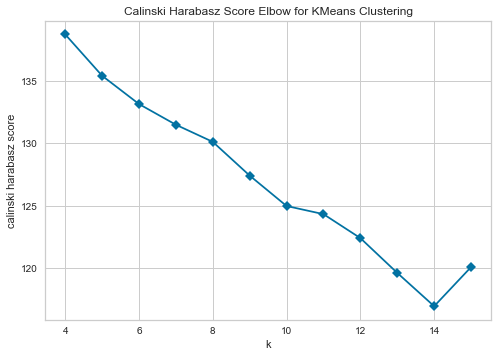

In [58]:
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans(init='k-means++', max_iter=1000, n_init=5, algorithm='elkan')
visualizer = KElbowVisualizer(
    model, k=(4,16), metric='calinski_harabasz', timings=False
)

visualizer.fit(groupby_domains_StandardScaler)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

- ### With the Robust Scaler transformation:

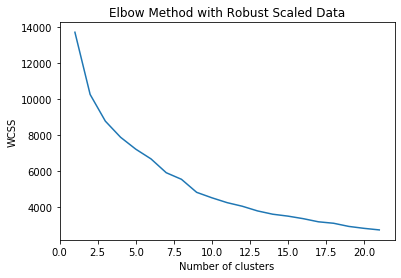

In [22]:
wcss = []
for i in range(1, 22):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=1000, n_init=5, algorithm='auto')
    kmeans.fit(groupby_domains_RobustScaler)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 22), wcss)
plt.title('Elbow Method with Robust Scaled Data')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

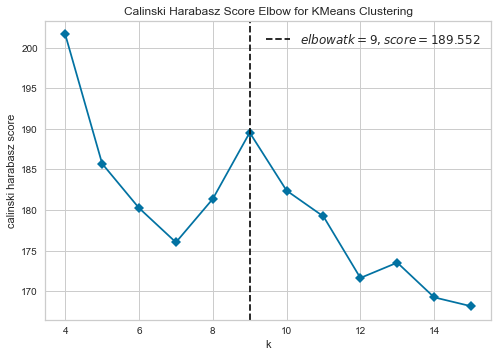

In [64]:
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans(init='k-means++', max_iter=1000, n_init=5, algorithm='auto')
visualizer = KElbowVisualizer(
model, k=(4,16),  metric='calinski_harabasz', timings=False
)

visualizer.fit(groupby_domains_RobustScaler)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

- **My first impression is that, in order to simplify and make the advertiser decision easier, detecting a specific cluster attending to its preferences, the number of clusters should not be more than 10**

- **The GridSearchCV best result for n_clusters is the maximum I defined (14 in the first case, and 16 in the second case). But attending to the Elbow Method I´m gonna train the Kmeans Model with 9 clusters**

## Training the KMEANS model

- ### With the optimal parameters for Standard Scaled Data, based on the GridSearchCV results

In [23]:
kmeans_StandardScaler = KMeans(n_clusters=9, init='k-means++', max_iter=1000, n_init=5, algorithm='elkan')
kmeans_StandardScaler.fit(groupby_domains_StandardScaler)


KMeans(algorithm='elkan', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=9, n_init=5, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

- Clustering division:

In [49]:
pd.DataFrame(kmeans_StandardScaler.labels_)[0].value_counts()

5    221
4    217
2    172
7     69
1     56
8     29
0     26
3     19
6      9
Name: 0, dtype: int64

In [40]:
df_kmeans_StandardScaler = groupby_domains_clustering
df_kmeans_StandardScaler['Cluster'] = kmeans_StandardScaler.labels_
df_kmeans_StandardScaler.groupby('Cluster').mean()

,Format Loads,Impressions,Format Fill Rate,CPM,Clicks,CTR,50% View Rate,Category importance,Domain Recurrence
Cluster,,,,,,,,,
0,131410.17,8183.05,6.82,1.60,159.74,1.97,68.77,0.38,0.32
1,144464.51,7463.38,6.27,1.68,39.49,0.51,71.86,0.04,0.17
2,802173.22,203268.14,37.85,1.70,1330.48,0.68,80.40,0.38,2.62
3,1122886.73,62124.65,7.79,1.65,417.49,0.67,71.95,0.31,1.25
4,166691.37,47173.24,32.85,1.67,243.50,0.59,78.38,0.32,0.65
5,144232.61,6537.24,5.36,1.70,41.68,0.62,75.52,0.59,0.22
6,235528.02,15909.49,8.37,1.68,114.39,0.73,74.92,0.41,2.18
7,113236.58,1230.83,1.21,1.06,4.83,0.16,28.73,0.18,0.00
8,155178.67,3149.33,2.80,2.48,18.80,0.38,69.00,0.35,0.04


- Silhouette Score: a higher Silhouette Coefficient score relates to a model with better defined clusters

In [34]:
from sklearn.metrics import silhouette_score
silhouette_score(groupby_domains_StandardScaler, kmeans_StandardScaler.labels_, metric='euclidean')

0.2203868736886741

- Calinski-Harabasz Index: a higher Calinski-Harabasz score relates to a model with better defined clusters.

In [44]:
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz_score(groupby_domains_StandardScaler, kmeans_StandardScaler.labels_)

128.1001651588471

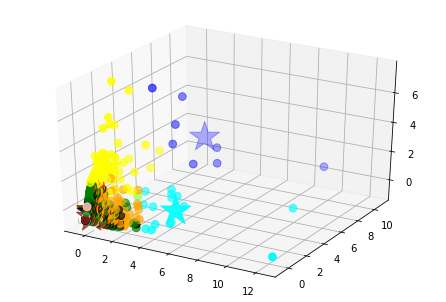

In [27]:
from mpl_toolkits.mplot3d import Axes3D 
# Predicting the clusters
labels = kmeans_StandardScaler.predict(groupby_domains_StandardScaler)
# Getting the cluster centers
C = kmeans_StandardScaler.cluster_centers_
colores=['red','green','blue','cyan','yellow','black','orange','white','brown']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(groupby_domains_StandardScaler[:, 0], groupby_domains_StandardScaler[:, 1], groupby_domains_StandardScaler[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

- ### With the optimal parameters for Robust Scaled Data, based on the GridSearchCV results

In [24]:
kmeans_RobustScaler = KMeans(n_clusters=9, init='k-means++', max_iter=1000, n_init=5, algorithm='auto')
kmeans_RobustScaler.fit(groupby_domains_RobustScaler)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=9, n_init=5, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

- Clustering division:

In [25]:
pd.DataFrame(kmeans_RobustScaler.labels_)[0].value_counts()

2    395
3    165
0    118
7     49
5     45
8     29
6     11
1      4
4      2
Name: 0, dtype: int64

In [39]:
df_kmeans_RobustScaler = groupby_domains_clustering
df_kmeans_RobustScaler['Cluster'] = kmeans_RobustScaler.labels_
df_kmeans_RobustScaler.groupby('Cluster').mean()

,Format Loads,Impressions,Format Fill Rate,CPM,Clicks,CTR,50% View Rate,Category importance,Domain Recurrence
Cluster,,,,,,,,,
0,131837.44,28258.26,23.09,1.65,197.27,0.83,77.46,0.35,0.64
1,1098152.44,237134.96,30.68,1.66,1976.72,0.92,80.37,0.59,2.50
2,122288.71,5140.60,4.69,1.67,34.19,0.68,72.43,0.32,0.14
3,201063.60,12732.35,7.47,1.68,87.61,0.71,74.34,0.38,2.11
4,2635461.77,81104.86,4.54,1.65,87.37,0.29,63.87,0.30,1.00
5,671843.30,26347.17,4.49,1.67,163.34,0.67,71.67,0.39,1.11
6,112942.69,1232.88,1.63,0.50,8.36,0.23,38.30,0.13,0.00
7,145287.81,3786.57,3.17,2.26,15.29,0.33,65.76,0.27,0.08
8,368611.19,88720.42,35.38,1.68,529.33,0.77,78.14,0.32,1.45


- Silhouette Score: a higher Silhouette Coefficient score relates to a model with better defined clusters

In [35]:
silhouette_score(groupby_domains_RobustScaler, kmeans_RobustScaler.labels_, metric='euclidean')

0.2168517644661034

- Calinski-Harabasz Index: a higher Calinski-Harabasz score relates to a model with better defined clusters.

In [45]:
calinski_harabasz_score(groupby_domains_RobustScaler, kmeans_RobustScaler.labels_)

182.30027986758768

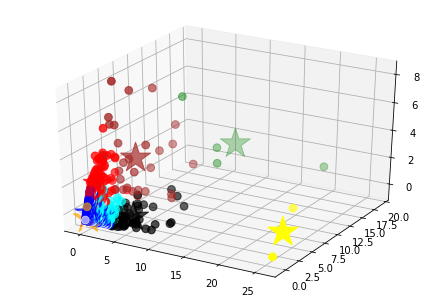

In [28]:
# Predicting the clusters
labels = kmeans_RobustScaler.predict(groupby_domains_RobustScaler)
# Getting the cluster centers
C = kmeans_RobustScaler.cluster_centers_
colores=['red','green','blue','cyan','yellow','black','orange','white','brown']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(groupby_domains_RobustScaler[:, 0], groupby_domains_RobustScaler[:, 1], groupby_domains_RobustScaler[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

- ### Plotting the clusters in each case:

In [29]:
def plot_clustering(data, clusters, centroids = []):
    
    K_ = len(set(clusters))
    
    plt.figure(figsize=(8,4))
    plt.scatter(data[:,0], data[:,1],
                c=clusters, cmap="plasma", linewidths=0)

    if centroids != []:
        for k in range(K_):
            plt.scatter(centroids[k,0], centroids[k, 1], s=100, marker='D', color='red')
        
    plt.show()


C:\Users\Usuario\anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if __name__ == '__main__':


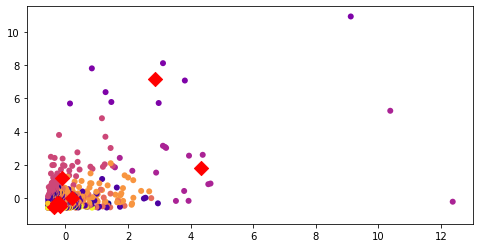

In [30]:
centroids_sk = kmeans_StandardScaler.cluster_centers_
clusters_sk = kmeans_StandardScaler.predict(groupby_domains_StandardScaler)
plot_clustering(groupby_domains_StandardScaler, clusters_sk, centroids_sk)

C:\Users\Usuario\anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if __name__ == '__main__':


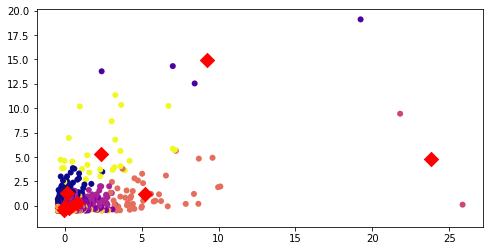

In [31]:
centroids_sk = kmeans_RobustScaler.cluster_centers_
clusters_sk = kmeans_RobustScaler.predict(groupby_domains_RobustScaler)
plot_clustering(groupby_domains_RobustScaler, clusters_sk, centroids_sk)

- ### Silhouette analysis

Silhouette analysis can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. This measure has a range of [-1, 1].


For n_clusters = 2 The average silhouette_score is : 0.6558438251101264
For n_clusters = 3 The average silhouette_score is : 0.2993433205921415
For n_clusters = 4 The average silhouette_score is : 0.29008347788186345
For n_clusters = 5 The average silhouette_score is : 0.29549249817533446
For n_clusters = 6 The average silhouette_score is : 0.20827866634207617
For n_clusters = 8 The average silhouette_score is : 0.18064571893331496
For n_clusters = 10 The average silhouette_score is : 0.2125998625365752
For n_clusters = 12 The average silhouette_score is : 0.18091324129906208
For n_clusters = 14 The average silhouette_score is : 0.18286603123687847
For n_clusters = 16 The average silhouette_score is : 0.18779686098962942


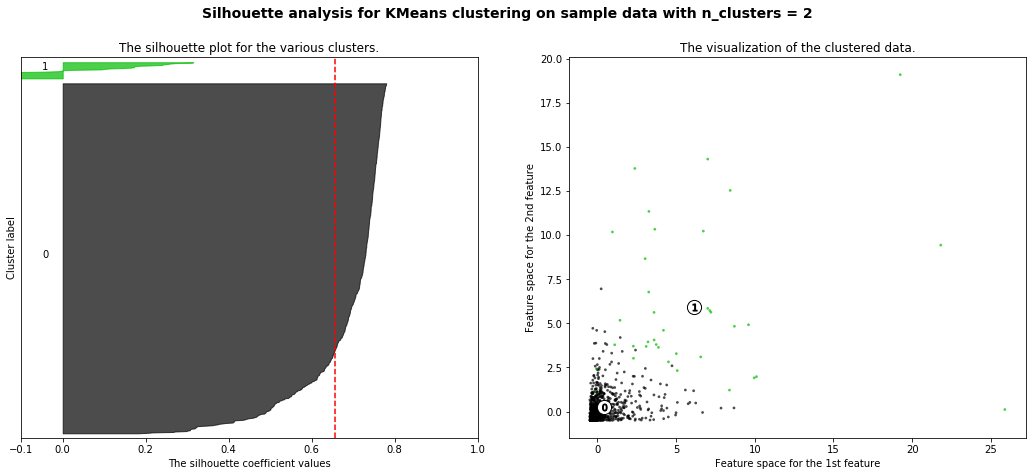

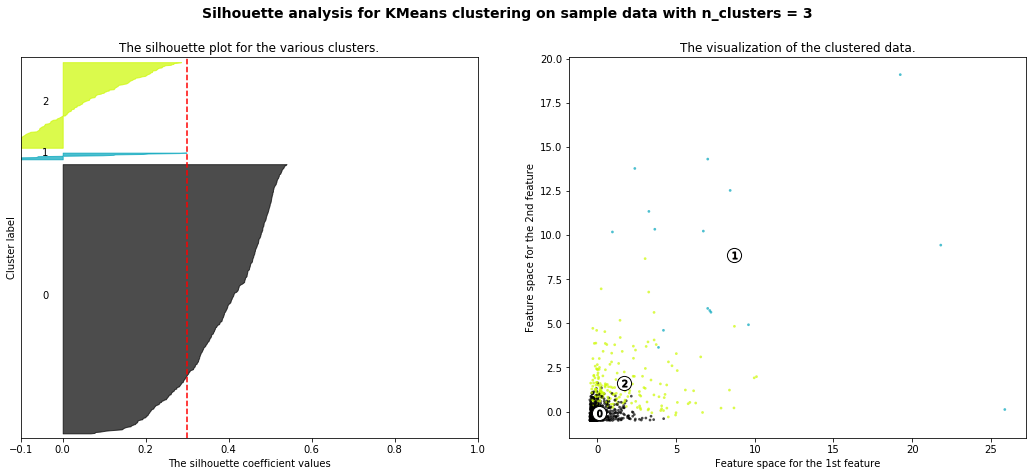

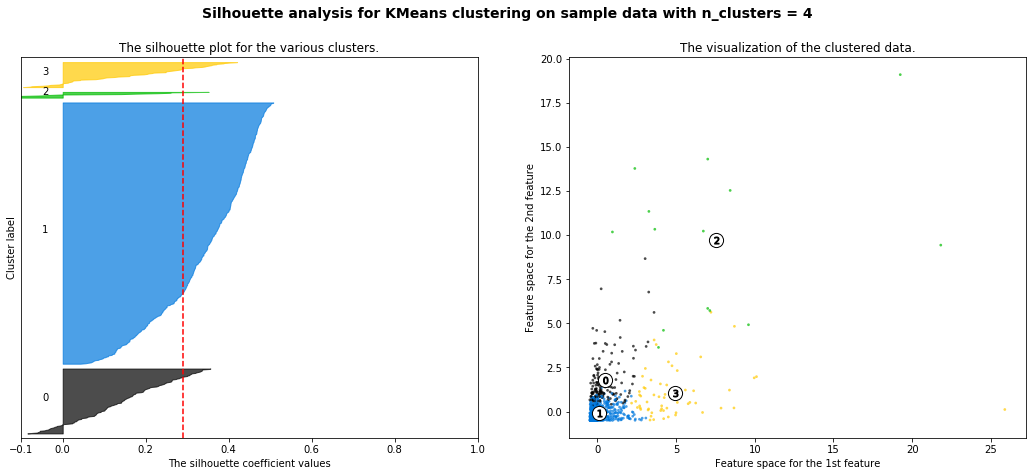

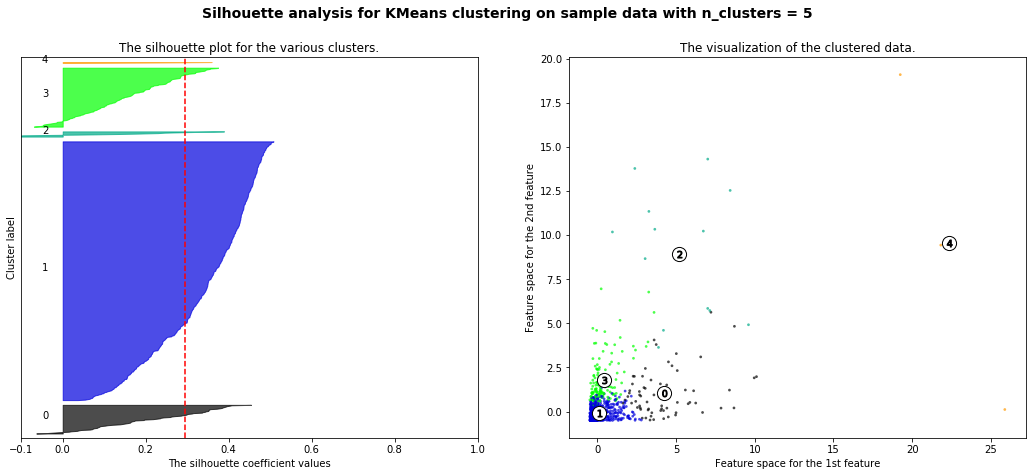

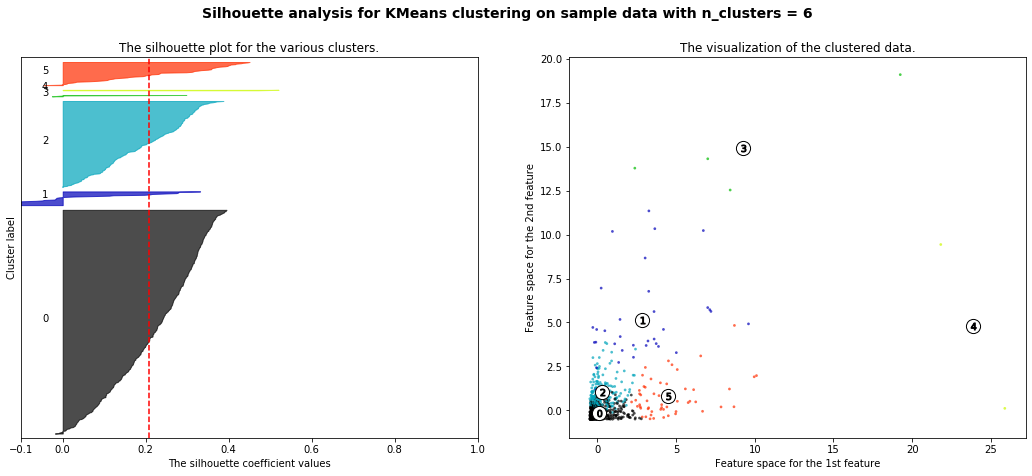

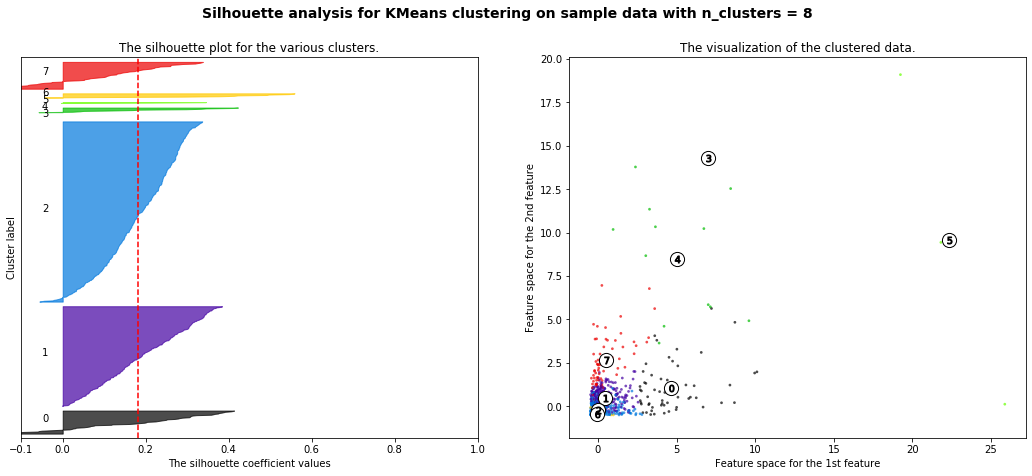

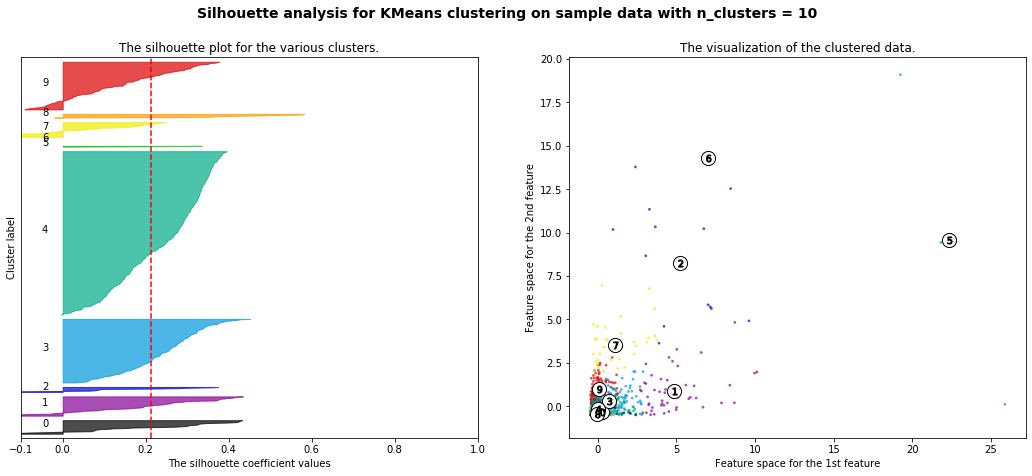

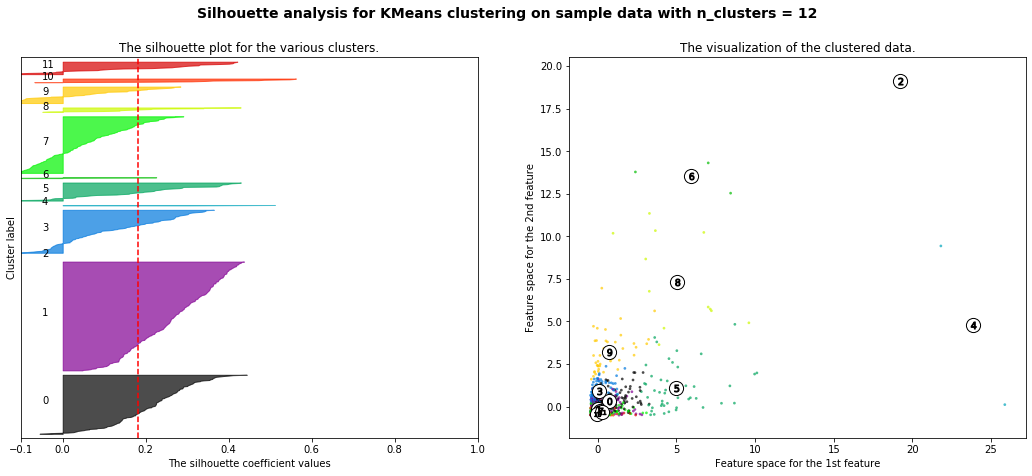

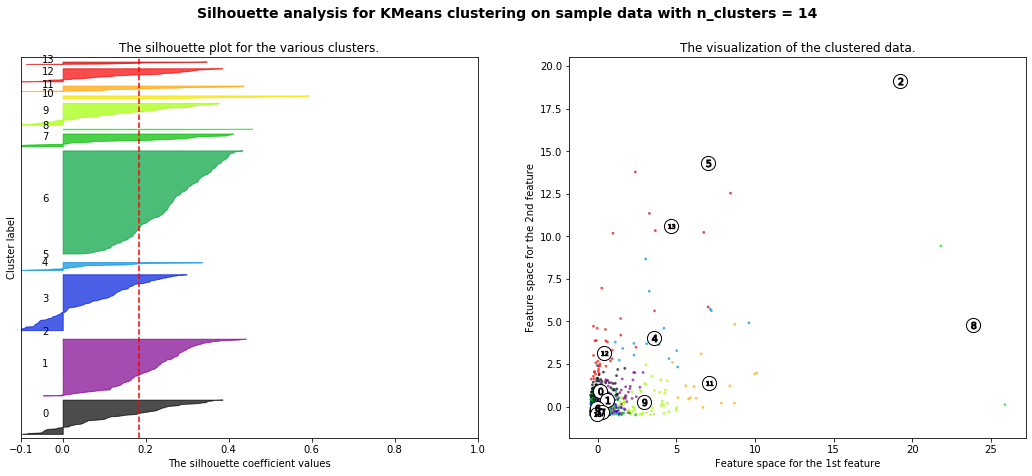

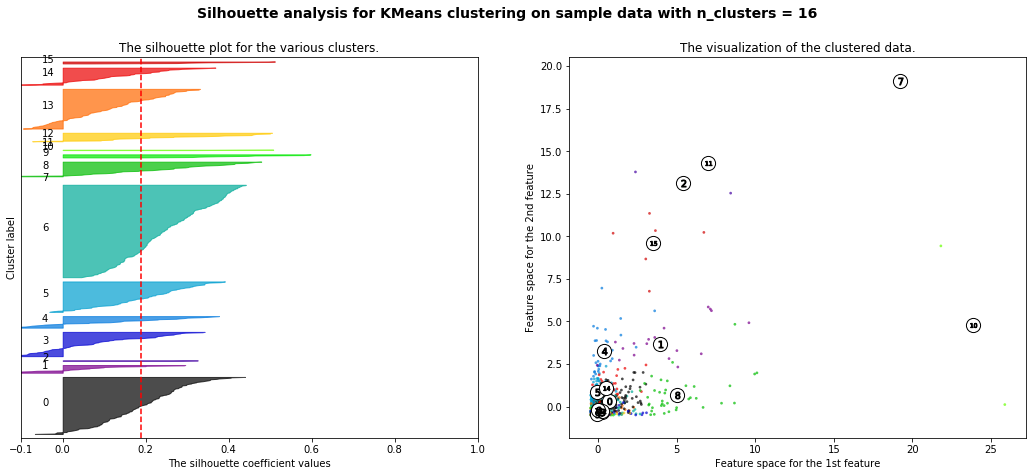

In [43]:
range_n_clusters = [2, 3, 4, 5, 6, 8, 10, 12, 14, 16]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(groupby_domains_RobustScaler) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=1000, n_init=5, algorithm='auto')
    cluster_labels = clusterer.fit_predict(groupby_domains_RobustScaler)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(groupby_domains_RobustScaler, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(groupby_domains_RobustScaler, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(groupby_domains_RobustScaler[:, 0], groupby_domains_RobustScaler[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

Silhouette coefficients (as these values are referred to as) near +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.

- ### Conclusions:

K-means doesn´t seem to be a good model for this data. The main reasons are:

- In a range bewteen -1 and 1, if the Silhouette Score is close to one, that means clusters are dense and well separated, which relates to a standard concept of a cluster. In both cases the Silhouette Score is around 0.20. And in the Silhouette Score analysis, we can confirm that we only have a decent score when the number of clusters is 2

- It´s visually difficult to diferenciate the clusters in the graph

- K-Means doesn´t use to work well with large datasets and many features, and it has proven that the eucledian distance metric can be a wrong metric with high dimensions

- Ouliers is clearly a problem in this dataset and Kmeans algorithm is really sensitive to this ouliers, although I´ve applied the Robust Scaler transformation, which minimizes the impact of the outliers 

- According to the evalution metrics (Silhouette Score and Calinski-Harabasz Index) there´s not a big difference between using the data with the Standard Scaler transformation, or the Robust Scaler transformation






## HIERARCHICAL CLUSTERING

In [375]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.metrics.pairwise import manhattan_distances


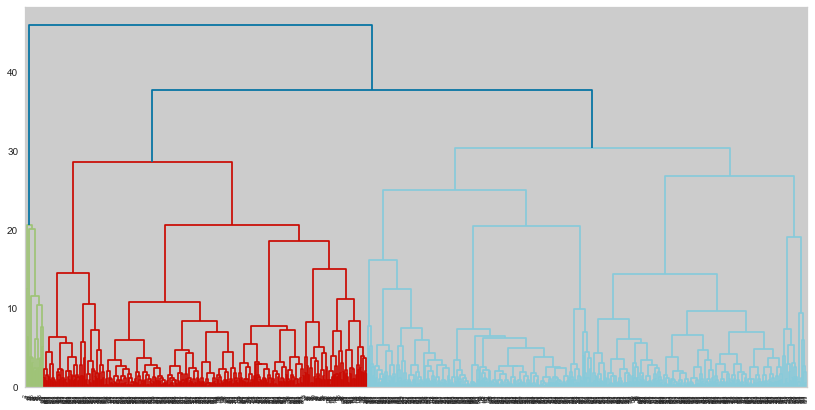

In [376]:
Z = linkage(groupby_domains_StandardScaler, 'ward') #'single', 'ward', ...
plt.figure(figsize=(14, 7))
dendrogram(Z)
plt.show()

In [382]:
from scipy.cluster.hierarchy import fcluster
cut_distance = 25
clusters_hc = fcluster(Z, t = cut_distance, criterion='distance')
np.unique(clusters_hc, return_counts = True)

(array([1, 2, 3, 4, 5, 6, 7], dtype=int32),
 array([ 19,  64, 275,  87, 148, 200,  25], dtype=int64))

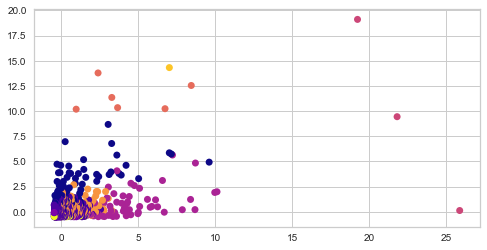

In [383]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=9)  

# fit data and predict 
clusters = cluster.fit_predict(groupby_domains_RobustScaler)

plot_clustering(groupby_domains_RobustScaler, clusters)

## DBSCAN

- First, I´m going to find the optimal value of eps, the value for which two points are considered neighbors if the distance between the two points is below the threshold epsilon. We can calculate the distance from each point to its closest neighbour using the NearestNeighbors. The point itself is included in n_neighbors. The kneighbors method returns two arrays, one which contains the distance to the closest n_neighbors points and the other which contains the index for each of those points.

- ### With Robust Scaler Data

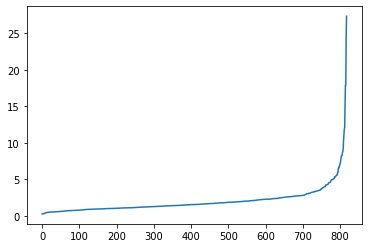

In [46]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(p=1)
nbrs = neigh.fit(groupby_domains_RobustScaler)
distances, indices = nbrs.kneighbors(groupby_domains_RobustScaler)

#Next, I sort and plot results.
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [47]:
from sklearn.cluster import DBSCAN
dbs = DBSCAN(eps=1, min_samples=5)
dbs = dbs.fit(groupby_domains_RobustScaler)

id_clusters = np.unique(dbs.labels_)
print('Found {} clusters'.format(len(id_clusters)))
np.unique(dbs.labels_, return_counts=True)

Found 9 clusters


(array([-1,  0,  1,  2,  3,  4,  5,  6,  7], dtype=int64),
 array([391,   7,  62, 298,  27,  11,   5,  10,   7], dtype=int64))

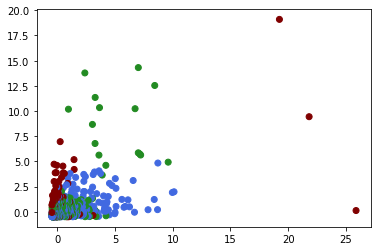

In [85]:
colors = ['royalblue', 'maroon', 'forestgreen']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

plt.scatter(groupby_domains_RobustScaler[:,0], groupby_domains_RobustScaler[:,1], c=vectorizer(clusters))


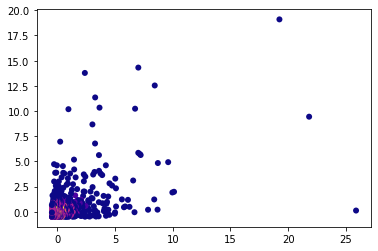

In [48]:
plt.scatter(groupby_domains_RobustScaler[:,0], groupby_domains_RobustScaler[:,1], c=dbs.labels_, cmap="plasma", linewidths=0);

- ### With Standard Scaler Data

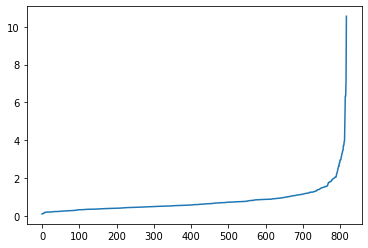

In [50]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors()
nbrs = neigh.fit(groupby_domains_StandardScaler)
distances, indices = nbrs.kneighbors(groupby_domains_StandardScaler)

#Next, I sort and plot results.
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [51]:
from sklearn.cluster import DBSCAN
dbs = DBSCAN(eps=1, min_samples=5)
dbs = dbs.fit(groupby_domains_StandardScaler)

id_clusters = np.unique(dbs.labels_)
print('Found {} clusters'.format(len(id_clusters)))
np.unique(dbs.labels_, return_counts=True)

Found 10 clusters


(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8], dtype=int64),
 array([248,  23, 188, 177,  74,  52,  31,  16,   5,   4], dtype=int64))

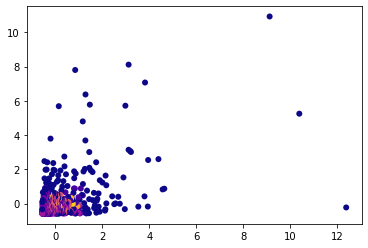

In [52]:
plt.scatter(groupby_domains_StandardScaler[:,0], groupby_domains_StandardScaler[:,1], c=dbs.labels_, cmap="plasma", linewidths=0);

- ### Conclusions:

It didn´t work well. Too many clusters with only a few observations


## OPTICS

In [82]:
from sklearn.cluster import OPTICS
optics_clustering_RobustScaler = OPTICS().fit(groupby_domains_RobustScaler)

In [83]:
pd.DataFrame(optics_clustering_RobustScaler.labels_)[0].value_counts()

-1     704
 3      10
 12     10
 7      10
 9       9
 4       8
 5       8
 1       8
 14      7
 15      6
 6       6
 0       6
 8       6
 10      5
 11      5
 13      5
 2       5
Name: 0, dtype: int64

In [84]:
df_optics_clustering = groupby_domains_clustering
df_optics_clustering['Cluster'] = optics_clustering_RobustScaler.labels_
df_optics_clustering.groupby('Cluster').mean()

,Format Loads,Impressions,Format Fill Rate,CPM,Clicks,CTR,50% View Rate,Category importance,Domain Recurrence
Cluster,,,,,,,,,
-1,202429.26,16299.54,9.19,1.69,107.51,0.70,72.42,0.34,0.72
0,290524.97,21911.80,7.96,1.68,130.46,0.70,75.93,0.59,3.00
1,121167.16,12156.94,11.15,1.62,108.90,0.90,78.95,0.59,2.00
2,137879.30,21436.98,16.94,1.64,142.91,0.73,80.35,0.59,2.00
3,113082.69,6958.85,6.12,1.72,43.47,0.63,76.80,0.59,1.00
4,86122.92,3513.79,4.10,1.64,18.70,0.58,72.25,0.59,0.00
5,93036.09,820.62,0.89,1.67,1.43,0.12,83.14,0.59,0.00
6,95199.80,2549.41,2.87,1.56,38.52,1.38,79.21,0.59,0.00
7,90654.57,699.22,0.76,1.63,1.49,0.09,78.77,0.04,0.00


- Silhouette Score: a higher Silhouette Coefficient score relates to a model with better defined clusters

In [87]:
silhouette_score(groupby_domains_RobustScaler, optics_clustering_RobustScaler.labels_, metric='euclidean')

-0.39354651719624

- ### Conclusions:

We can clearly see that this model doesn´t perform well with this data

## PCA + KMEANS

By reducing the number of features, we’re improving the performance of our algorithm. On top of that, by decreasing the number of features the noise is also reduced.
In the case of PCA and K-means in particular, there appears to be an even closer relationship between the two.

- **With the Robust Scaler data**

In [89]:
pca = PCA()
pca.fit(groupby_domains_RobustScaler)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [90]:
pca.explained_variance_ratio_

array([0.45105266, 0.18194262, 0.12982704, 0.07434757, 0.05545923,
       0.04837514, 0.03058476, 0.01477572, 0.01363526])

Text(0, 0.5, 'Cumulative explained variance')

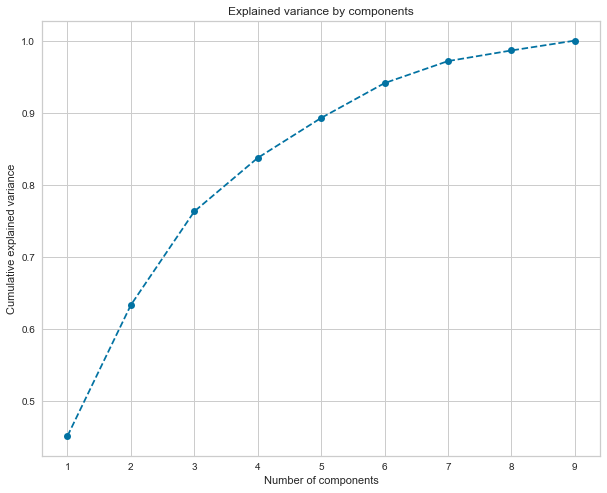

In [91]:
plt.figure(figsize=(10,8))
plt.plot(range(1,10), pca.explained_variance_ratio_.cumsum(), marker= 'o' , linestyle = '--')
plt.title('Explained variance by components')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

 A rule of thumb is to preserve around 80 % of the variance. So, in this instance, I decide to keep 4 components. I´ll perform PCA with the chosen number of components.

In [133]:
pca_robustscaler = PCA(n_components=4)
pca_robustscaler.fit(groupby_domains_RobustScaler)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [134]:
scores_pca_robustscaler = pca_robustscaler.transform(groupby_domains_RobustScaler)

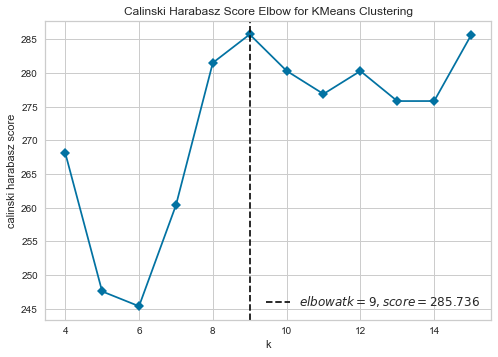

In [152]:
# Instantiate the clustering model and visualizer
model = KMeans(init='k-means++', max_iter=1000, n_init=5, algorithm='auto')
visualizer = KElbowVisualizer(
    model, k=(4,16), metric='calinski_harabasz', timings=False
)

visualizer.fit(scores_pca_robustscaler)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

- Initializing the KElbowVisualizer several times with the 3 kind of metrics (distortion, Silhouette and calinski_harabasz) the optimal number of clusters is between 8-10

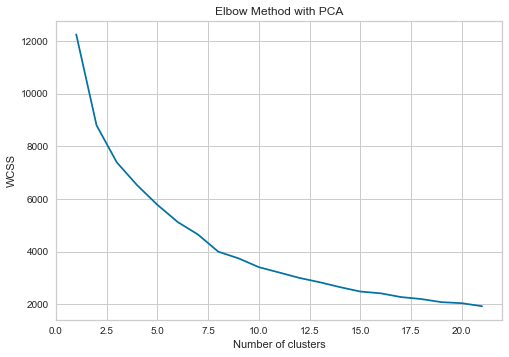

In [121]:
wcss = []
for i in range(1, 22):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=1000, n_init=5, algorithm='auto')
    kmeans.fit(scores_pca_robustscaler)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 22), wcss)
plt.title('Elbow Method with PCA')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [178]:
kmeans_pca_robustscaler = KMeans(n_clusters=9, init='k-means++', max_iter=1000, n_init=5, algorithm='auto')
kmeans_pca_robustscaler.fit(scores_pca_robustscaler)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=9, n_init=5, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

- Clustering division:

In [179]:
pd.DataFrame(kmeans_pca_robustscaler.labels_)[0].value_counts()

0    535
3    133
1     78
2     27
5     23
8     11
7      7
6      3
4      1
Name: 0, dtype: int64

In [217]:
print('The Silhouette Score is:', silhouette_score(scores_pca_robustscaler, kmeans_pca_robustscaler.labels_))
print('The Calinski Harabasz Scoreis:', calinski_harabasz_score(scores_pca_robustscaler, kmeans_pca_robustscaler.labels_))

The Silhouette Score is: 0.3983077530266184
The Calinski Harabasz Scoreis: 277.95066079384657


- **With the Standard Scaler Data**

In [185]:
pca_standardscaler = PCA()
pca_standardscaler.fit(groupby_domains_StandardScaler)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [186]:
pca_standardscaler.explained_variance_ratio_

array([0.29756188, 0.13962693, 0.13301241, 0.12487757, 0.09571071,
       0.08336061, 0.0764808 , 0.03758407, 0.01178503])

Text(0, 0.5, 'Cumulative explained variance')

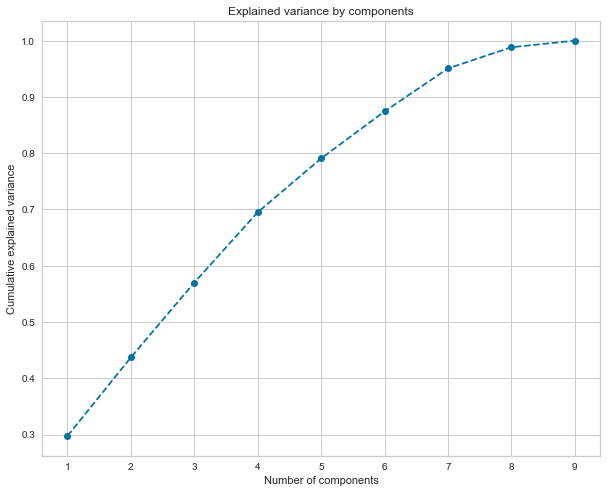

In [187]:
plt.figure(figsize=(10,8))
plt.plot(range(1,10), pca_standardscaler.explained_variance_ratio_.cumsum(), marker= 'o' , linestyle = '--')
plt.title('Explained variance by components')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [189]:
pca_standardscaler = PCA(n_components=5)
pca_standardscaler.fit(groupby_domains_StandardScaler)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [190]:
scores_pca_SS = pca_standardscaler.transform(groupby_domains_StandardScaler)

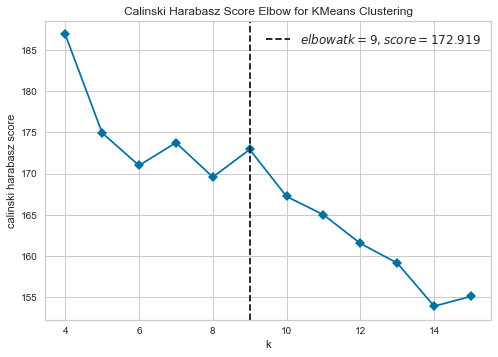

In [194]:
# Instantiate the clustering model and visualizer
model = KMeans(init='k-means++', max_iter=1000, n_init=5, algorithm='elkan')
visualizer = KElbowVisualizer(
    model, k=(4,16), metric='calinski_harabasz', timings=False
)

visualizer.fit(scores_pca_SS)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

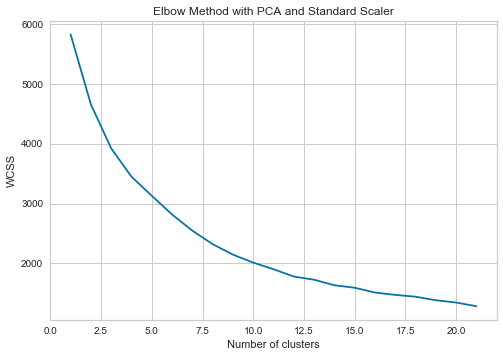

In [201]:
wcss = []
for i in range(1, 22):
    kmeans = KMeans(n_clusters=i, init='random', max_iter=100, n_init=20, algorithm='elkan')
    kmeans.fit(scores_pca_SS)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 22), wcss)
plt.title('Elbow Method with PCA and Standard Scaler')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [206]:
kmeans_pca_standardscaler = KMeans(n_clusters=9, init='random', max_iter=100, n_init=20, algorithm='elkan')
kmeans_pca_standardscaler.fit(scores_pca_SS)

KMeans(algorithm='elkan', copy_x=True, init='random', max_iter=100,
       n_clusters=9, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

- Clustering division:

In [207]:
pd.DataFrame(kmeans_pca_standardscaler.labels_)[0].value_counts()

8    249
0    197
3    168
7     82
2     55
4     27
1     23
6      9
5      8
Name: 0, dtype: int64

In [219]:
print('The Silhouette Score is:', silhouette_score(scores_pca_SS, kmeans_pca_standardscaler.labels_))
print('The Calinski Harabasz Score is:', calinski_harabasz_score(scores_pca_SS, kmeans_pca_standardscaler.labels_))

The Silhouette Score is: 0.21887675362977327
The Calinski Harabasz Score is: 171.8782332787543


- ### Conclussions:

K-Means + PCA transformation with the Robust Scaler data gives a significant better result than the K-Means algorithm without PCA. The Silhouette Score improves almost 20%. K-Means + PCA transformation with the Standard Scaler gives poor results.

Nevertheless, there is still a density problem: almost 65% of the points belong to only one cluster, which makes really difficult to interpretate


## K-MEDOIDS

- With the Robust Scaler Data

In [223]:
%run KMEDOIDS.py

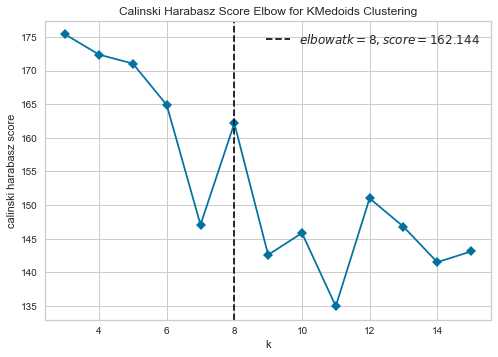

In [249]:
# Instantiate the clustering model and visualizer
model = KMedoids(init= 'k-medoids++')
visualizer = KElbowVisualizer(
    model, k=(3,16), metric='calinski_harabasz', timings=False
)

visualizer.fit(groupby_domains_RobustScaler)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

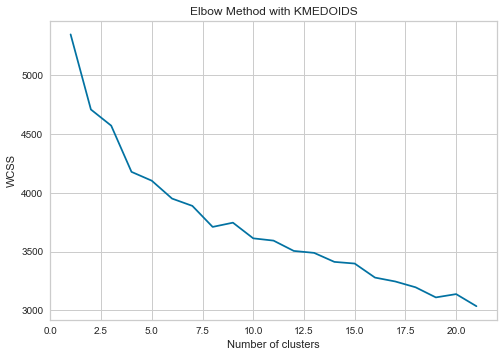

In [255]:
wcss = []
for i in range(1, 22):
    kmedoids = KMedoids(n_clusters = i, metric='manhattan',init= 'k-medoids++')
    kmedoids.fit(groupby_domains_RobustScaler)
    wcss.append(kmedoids.inertia_)
plt.plot(range(1, 22), wcss)
plt.title('Elbow Method with KMEDOIDS')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [370]:
kmedoids = KMedoids(n_clusters = 10, init= 'k-medoids++')
kmedoids.fit(groupby_domains_RobustScaler)

KMedoids(init='k-medoids++', max_iter=300, metric='euclidean', n_clusters=10,
         random_state=None)

In [371]:
pd.DataFrame(kmedoids.labels_)[0].value_counts()

2    236
9    168
0    149
6    105
7     57
8     54
1     30
4     12
5      4
3      3
Name: 0, dtype: int64

In [275]:
print('The Silhouette Score is:', silhouette_score(groupby_domains_RobustScaler, kmedoids.labels_))
print('The Calinski Harabasz Score is:', calinski_harabasz_score(groupby_domains_RobustScaler, kmedoids.labels_))

The Silhouette Score is: 0.1140993858787784
The Calinski Harabasz Score is: 144.79430509641838


- **With the PCA scores**

In [278]:
pca_robustscaler

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

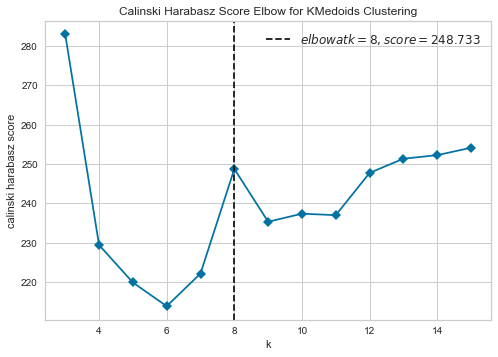

In [279]:
# Instantiate the clustering model and visualizer
model = KMedoids(init= 'k-medoids++')
visualizer = KElbowVisualizer(
    model, k=(3,16), metric='calinski_harabasz', timings=False
)

visualizer.fit(scores_pca_robustscaler)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

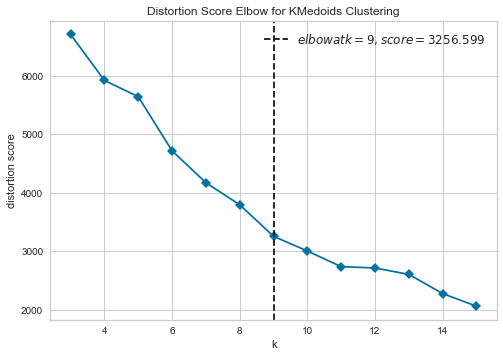

In [292]:
# Instantiate the clustering model and visualizer
model = KMedoids(init= 'k-medoids++')
visualizer = KElbowVisualizer(
    model, k=(3,16), timings=False
)

visualizer.fit(scores_pca_robustscaler)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

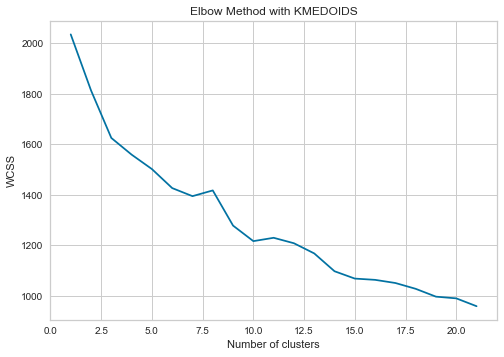

In [294]:
wcss = []
for i in range(1, 22):
    kmedoids = KMedoids(n_clusters = i,init= 'k-medoids++')
    kmedoids.fit(scores_pca_robustscaler)
    wcss.append(kmedoids.inertia_)
plt.plot(range(1, 22), wcss)
plt.title('Elbow Method with KMEDOIDS')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

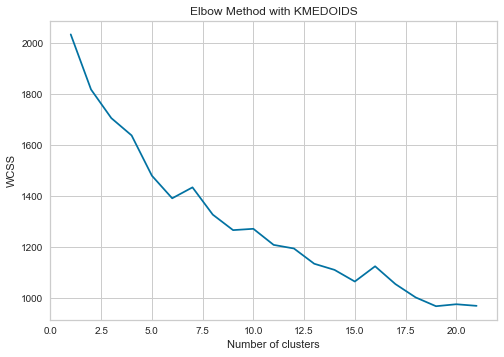

In [338]:
wcss = []
for i in range(1, 22):
    kmedoids = KMedoids(n_clusters = i,init= 'k-medoids++', metric= 'minkowski')
    kmedoids.fit(scores_pca_robustscaler)
    wcss.append(kmedoids.inertia_)
plt.plot(range(1, 22), wcss)
plt.title('Elbow Method with KMEDOIDS')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [372]:
kmedoids = KMedoids(n_clusters = 10, init= 'k-medoids++')
kmedoids.fit(scores_pca_robustscaler)

KMedoids(init='k-medoids++', max_iter=300, metric='euclidean', n_clusters=10,
         random_state=None)

In [373]:
pd.DataFrame(kmedoids.labels_)[0].value_counts()

2    357
9    173
0    159
5     51
7     25
1     25
6     13
4     10
8      4
3      1
Name: 0, dtype: int64

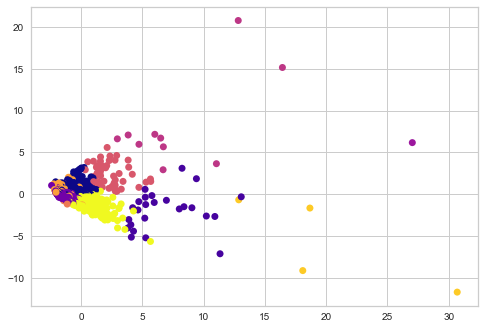

In [374]:
plt.scatter(scores_pca_robustscaler[:,0], scores_pca_robustscaler[:,1], c=kmedoids.labels_, cmap="plasma", linewidths=0);

In [335]:
print('The Silhouette Score is:', silhouette_score(groupby_domains_RobustScaler, kmedoids.labels_))
print('The Calinski Harabasz Score is:', calinski_harabasz_score(groupby_domains_RobustScaler, kmedoids.labels_))

The Silhouette Score is: 0.15692202867250782
The Calinski Harabasz Score is: 131.6100915544536


### Hopkins statistic

In [342]:
from pyclustertend import hopkins

print(hopkins(groupby_domains_RobustScaler,818))
print(hopkins(scores_pca_robustscaler,818))
print(hopkins(groupby_domains_clustering,818))
print(hopkins(scores_pca_SS,818))
print(hopkins(scores_pca,818))
print(hopkins(groupby_domains_StandardScaler,818))

0.07419983745738848
0.05932151360682001
0.03273018208811419
0.10779049754047425
0.0593814497879353
0.0816729311972369


### Visual Assessment of cluster Tendency (VAT)

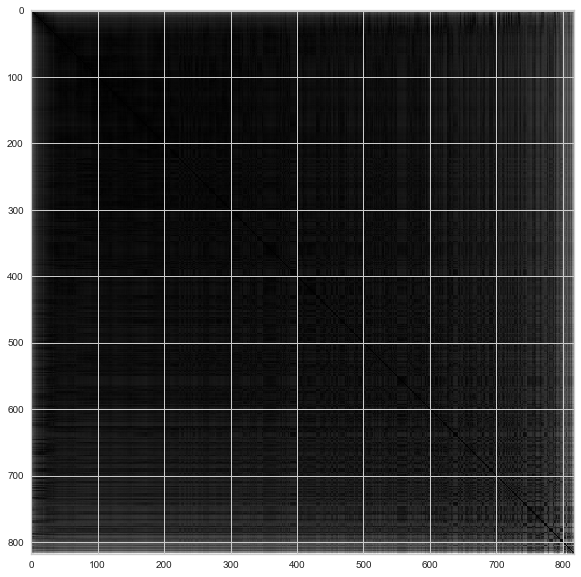

In [363]:
from pyclustertend import vat
vat(scores_pca_robustscaler)